## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Column settings to view full contents in the column

In [2]:
pd.set_option('display.max_colwidth', None)

## Read the cleaned articles file and save in dataframe

In [3]:
cleaned_articles_df = pd.read_csv("cleaned_articles.csv")

### Check the columns in articles dataframe

In [4]:
cleaned_articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42220 entries, 0 to 42219
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   publish_date     42220 non-null  object
 1   title            42220 non-null  object
 2   author           42220 non-null  object
 3   url              42220 non-null  object
 4   claps            42220 non-null  int64 
 5   responses        42220 non-null  int64 
 6   reading_time     42220 non-null  int64 
 7   paid             42220 non-null  int64 
 8   content          42220 non-null  object
 9   cleaned_content  42219 non-null  object
 10  cleaned_author   42220 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.5+ MB


## Read the cleaned jobs listings file and save in dataframe

In [5]:
cleaned_jobs_listings_df = pd.read_csv("cleaned_jobs_listings.csv")

### Check the columns in jobs listings dataframe

In [6]:
cleaned_jobs_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   job_title                3690 non-null   object 
 1   salary_estimate          3690 non-null   object 
 2   job_description          3690 non-null   object 
 3   rating                   3690 non-null   float64
 4   company_name             3690 non-null   object 
 5   location                 3690 non-null   object 
 6   headquarters             3690 non-null   object 
 7   size                     3690 non-null   object 
 8   founded                  3690 non-null   int64  
 9   type_of_ownership        3690 non-null   object 
 10  industry                 3690 non-null   object 
 11  sector                   3690 non-null   object 
 12  revenue                  3690 non-null   object 
 13  competitors              3690 non-null   object 
 14  easy_apply              

## Articles EDA

### Add stopwords

In [7]:
articles_stopwords = set(STOPWORDS)

In [8]:
# these are all the stopwords defined for articles
# most of these stopwords do not provide any useful information to analyse for our articles content
articles_stopwords.update(['data', 'use', 'like', 'ability', 'let', 'example',
                'need', 'new', 'user', 'provide', 'one', 'used', 'need', 
                'see', 'make', 'follow', 'going', 'will', 'want', 'well', 'find', 
                'give', 'change', 'look', 'first', 'using',
                'know', 'model', 'science', 'think', 'looking', 'problem', 'column', 
                'vallue', 'understand', 'take', 'problem', 'information', 'scientist', 
                'might', 'add', 'now', 'many', 'might', 'column', 'value', 'create',
                'result', 'case', 'article', 'set'])

### Join all the articles content into a single variable

In [9]:
all_articles_text = " ".join(article for article in cleaned_articles_df['cleaned_content'].astype(str))

### Articles WordCloud - most frequently used words

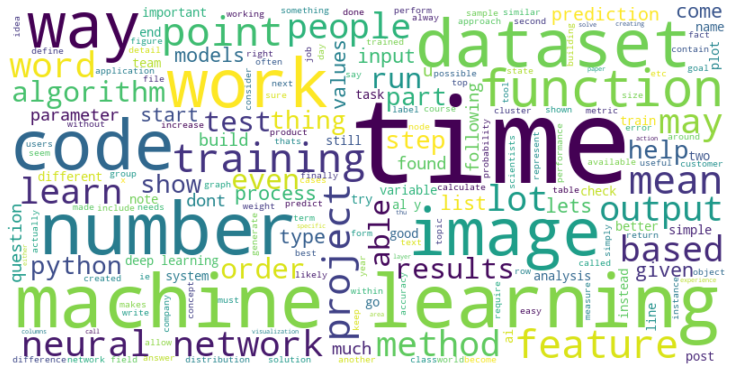

In [10]:
articles_wordcloud = WordCloud(stopwords=articles_stopwords, background_color="white", width=800, height=400).generate(all_articles_text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(articles_wordcloud, interpolation='bilinear')
plt.show()

<font color = "blue">
    The important words that appear frequently in most articles content includes: <br/><br/>
    - dataset <br/>
    - image <br/>
    - time <br/>
    - neural network <br/>
    - machine learning <br/>
    - function <br/>
    - code <br/>
    - project <br/>
    - code <br/>
    - training <br/>
    - feature <br/><br/>
    After checking on the articles in towardsdatascience.com, I can deduce that machine learning is still the main branch of specialty people are interested in data science. In the areas of machine learning, time series forecasting, computer vision and neural network are the type of machine learning modelling that are popular. Dataset is important as it is usually the starting point of a Data Science project. Therefore, there are numerous articles that are dedicated to creating, building and collecting datasets from scratch using API or scraping from readily available public websites. Handling imbalanced dataset is also another popular topic as most datasets will usually be imbalanced and it requires some techniques to handle them so that modelling those datasets will provide better results. Writing codes are also important so that is why many articles have lines of code embedded to show steps to achieve the machine learning model. Using the available functions in python for data science such as pandas and others are also crucial as it makes coding for data science much easier process. Other important process includes feature engineering and training machine learning models. As a data science student or someone who already has a career in Data Science, building projects is also important and there are many articles dedicated to writing about the kind of data science projects that will make it successful.
</font>

### Top Articles with most likes

In [11]:
cleaned_articles_df.sort_values(by=['claps'], ascending=False)[['title', 'claps']].head(10)

,title,claps
38958,Why so many data scientists are leaving their jobs,52000
38466,How to build your own Neural Network from scratch in Python,43000
38159,What exactly can you do with Python? Here are Python’s 3 main applications.,42000
40537,10 Common Software Architectural Patterns in a nutshell,35000
38148,Object Detection with 10 lines of code,25000
36933,How To Learn Data Science If You’re Broke,22000
37938,How to land a Data Scientist job at your dream company — My journey to Airbnb,20000
39437,The 5 Clustering Algorithms Data Scientists Need to Know,20000
39173,Introduction to Markov Chains,19910
37914,How to Build a Data Science Portfolio,18500


<font color = "blue">
    After the insight gained from wordcloud above, it is not surprising that some topics mentioned above made it to the top ten articles with most likes from readers contains topics such as neural network and computer vision. In addition to that, articles relating to Data Science career are also very popular since 3 articles are related: <br/><br/>
    - Why so many data scientists are leaving their jobs <br/>
    - How to land a Data Scientist job at your dream company — My journey to Airbnb	<br/>
    - How to Build a Data Science Portfolio <br/><br/>
Most of the top ten articles are informational that explain the steps: how, what, why

### Top Articles with most interactions

In [12]:
cleaned_articles_df.sort_values(by=['responses'], ascending=False)[['title', 'responses']].head(10)

,title,responses
38958,Why so many data scientists are leaving their jobs,298
40896,How to train your own Object Detector with TensorFlow’s Object Detector API,218
38148,Object Detection with 10 lines of code,187
38466,How to build your own Neural Network from scratch in Python,165
20885,Why Python is not the programming language of the future,162
39915,"Napoleon was the Best General Ever, and the Math Proves it.",148
22060,Why jK8v!ge4D isn’t a good password,136
38159,What exactly can you do with Python? Here are Python’s 3 main applications.,128
36222,How To Go Into Data Science?,123
37938,How to land a Data Scientist job at your dream company — My journey to Airbnb,123


<font color = "blue"> The articles with most responses containes mix of informational and controversial topics. Controversial headlines includes: <br/><br/>
    - Why Python is not the programming language of the future, <br/>
    - Napoleon was the Best General Ever, and the Math Proves it, <br/>
    - Why jK8v!ge4D isn’t a good password <br/><br/>
Same career related articles also elicit a lot of response from readers. Same neural network and computer vision article also get many responses as these are new areas in Data Science that has recently gained a lot of interest 
and many readers would like to learn more about them.
</font>

## Jobs Listings EDA

### Add stopwords

In [13]:
jobs_listings_stopwords = set(STOPWORDS)

In [14]:
jobs_listings_stopwords.update(['job', 'skill', 'experience', 'team', 'data', 'use', 'like', 'business', 
                                'work', 'ability', 'let', 'need', 'new', 'user', 'opportunity', 
                                'candidate', 'provide', 'company', 'one', 'used', 'need', 'see', 'make', 
                                'follow', 'going', 'will', 'want', 'well', 'find', 'give', 'change', 'look', 
                                'first', 'using','know', 'science', 'think', 'year', 'years', 'looking',
                                'including', 'working', 'scientist', 'employee', 'skills', 'scientist',
                                'knowledge', 'position', 'technology', 'computer'])

### Join all the jobs listings content into a single variable

In [15]:
all_jobs_listings_text = " ".join(job for job in cleaned_jobs_listings_df['cleaned_job_description'].astype(str))

### Jobs Listings WordCloud - most frequently used words

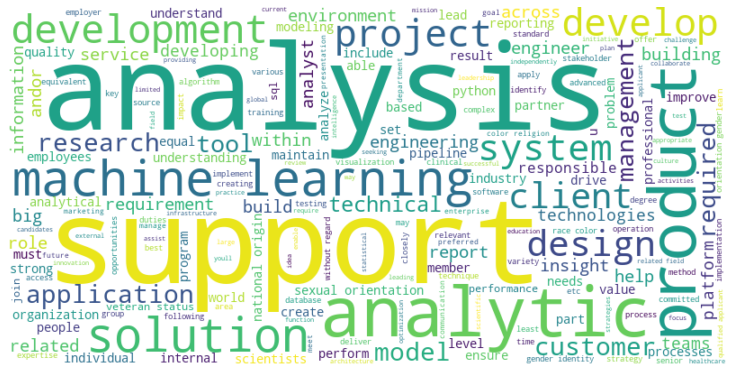

In [16]:
jobs_listings_wordcloud = WordCloud(stopwords=jobs_listings_stopwords, background_color="white", width=800, height=400).generate(all_jobs_listings_text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(jobs_listings_wordcloud, interpolation='bilinear')
plt.show()

<font color = "blue" >
    These are the most frequent words that appear in the jobs listings: <br/><br/>
- technical <br/>
- management <br/>
- support <br/>
- product <br/>
- service <br/>
- project <br/>
- analysis / analytic / analyst <br/>
- insight <br/>
- system <br/>
- application <br/>
- solution <br/>
- development <br/>
- research <br/><br/>   
Most of the data science jobs involve working with people from other teams such as the product team and even senior managements and providing them with some support. While not all position is specifically analyst title or researcher title, it is expected that Data Scientist does analysis and research as part of his or her work. While it is expected that you need to have technical skills as a Data Scientist, it also involves you explaining or translating the technical terms for other non-technical people that is involved in the project that you are working on and also explaining on the insights that you have gotten from the analysis. Most employers expect you to either directly or indirectly to develop solutions to some of their business problems. Some of them also prefer if you already understand some of the existing systems they use in the company. Quite a number of them quote public health system in the job description.
</font>

### Top Industry that hires most Data Science candidates

In [17]:
# remove -1 values in industry columns
filtered_industry_df = cleaned_jobs_listings_df[cleaned_jobs_listings_df['industry'] != '-1']

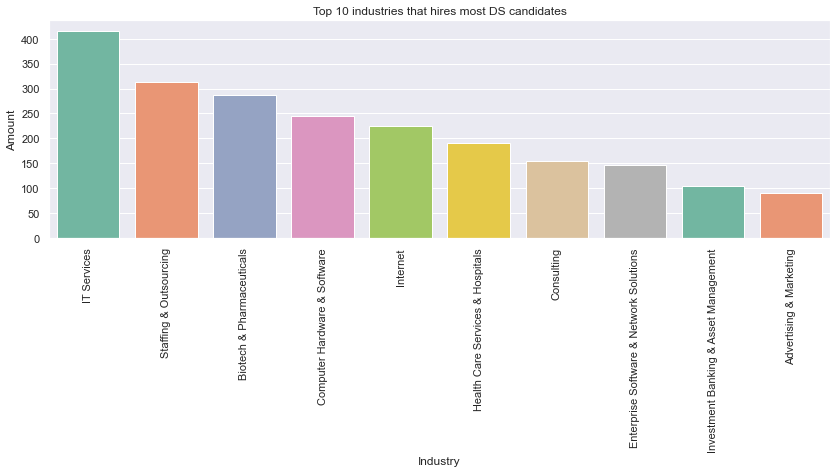

In [18]:
plt.figure(figsize=(14,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="industry", data=filtered_industry_df, palette="Set2", \
                   order=filtered_industry_df['industry'].value_counts().index[0:10])
ax.set(xlabel='Industry', ylabel='Amount', title="Top 10 industries that hires most DS candidates")
plt.xticks(rotation=90)
plt.show()

<font color = "blue">
    The most dominated industry is the IT services industry. Other IT related companies that includes Internet industry, Computer Hardware and Software and Enterprise Software and Network Solutions are also in the top five industry. It is easier for them to apply data science as they already have an existing and stable system where they have collected their data. Therefore, they are more comfortable in hiring Data Scientist. However, it does not mean that other industry does not really venture or hire data scientist. Most probably they approached Staffing and OutSourcing companies to help them with the hiring process. Other industries that are also looking to hire for Data Scientist are the Healthcare, Pharmaceutical industry, Investment Banking and Advertising and Marketing industry.
</font>

### Top Sector that hires most Data Science candidates

In [19]:
# remove -1 values in sector columns
filtered_sector_df = cleaned_jobs_listings_df[cleaned_jobs_listings_df['sector'] != '-1']

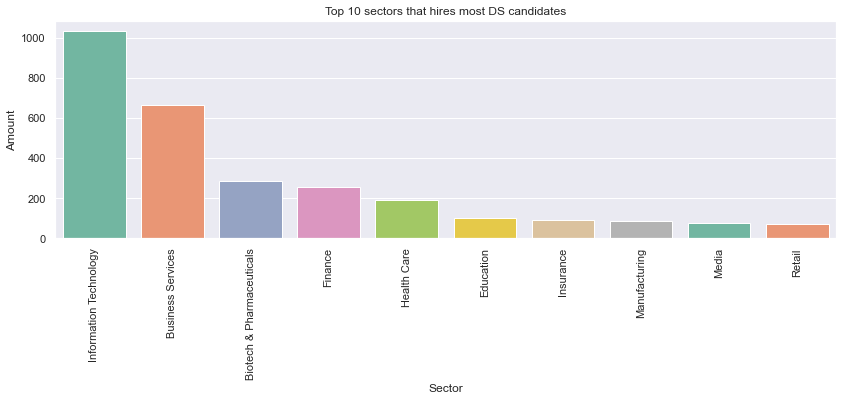

In [20]:
plt.figure(figsize=(14,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="sector", data=filtered_sector_df, palette="Set2", \
                   order=filtered_sector_df['sector'].value_counts().index[0:10])
ax.set(xlabel='Sector', ylabel='Amount', title="Top 10 sectors that hires most DS candidates")
plt.xticks(rotation=90)
plt.show()

<font color = "blue"> Most of the top ten sectors are also related to the top ten industry. They are Information Technology, Business Services, Biotech and Pharmaceuticals, Health Care, Finance, Media. The new sectors that were previously not mentioned are Education, Insurance, Manufacturing and Retail. They are possibly the ones that hire Data Scientist through Outsourcing companies.
</font>

### Top Ten Job Titles

In [21]:
# remove -1 values in job titles columns
filtered_job_titles_df = cleaned_jobs_listings_df[cleaned_jobs_listings_df['job_title'] != '-1']

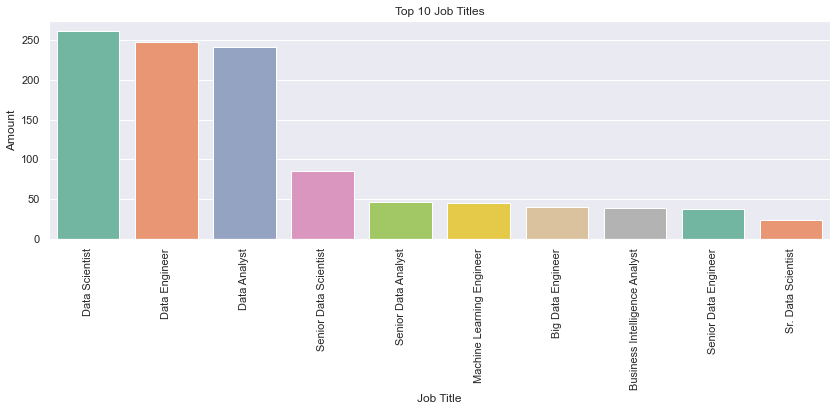

In [22]:
plt.figure(figsize=(14,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="job_title", data=filtered_job_titles_df, palette="Set2", \
                   order=filtered_job_titles_df['job_title'].value_counts().index[0:10])
ax.set(xlabel='Job Title', ylabel='Amount', title="Top 10 Job Titles")
plt.xticks(rotation=90)
plt.show()

<font color = "blue">
    There are a good mix of job positions as Data Scientist, Data Analayst and Data Engineer related titles. However, it seems there are not much demand for senior position in the Data engineering related roles. Most probably, most of them transition into other roles instead of remaining as a data engineer.
</font>

### Salary range of the top ten job positions

In [23]:
# Check all different types of salary estimates
cleaned_jobs_listings_df['salary_estimate'].unique()

array(['$111K-$181K (Glassdoor est.)', '$120K-$140K (Glassdoor est.)',
       '$119K-$147K (Glassdoor est.)', '$74K-$124K (Glassdoor est.)',
       '$102K-$121K (Glassdoor est.)', '$129K-$210K (Glassdoor est.)',
       '$156K-$254K (Glassdoor est.)', '$116K-$152K (Glassdoor est.)',
       '$133K-$171K (Glassdoor est.)', '$110K-$139K (Glassdoor est.)',
       '$82K-$141K (Glassdoor est.)', '$96K-$119K (Glassdoor est.)',
       '$146K-$175K (Glassdoor est.)', '$102K-$164K (Glassdoor est.)',
       '$113K-$180K (Glassdoor est.)', '$76K-$122K (Glassdoor est.)',
       '$134K-$218K (Glassdoor est.)', '$76K-$125K (Glassdoor est.)',
       '$132K-$208K (Glassdoor est.)', '$83K-$105K (Glassdoor est.)',
       '$75K-$143K (Glassdoor est.)', '$34K-$72K (Glassdoor est.)',
       '$37K-$75K (Glassdoor est.)', '$113K-$184K (Glassdoor est.)',
       '$136K-$164K (Glassdoor est.)', '$34-$53 Per Hour(Glassdoor est.)',
       '$46K-$80K (Glassdoor est.)', '$79K-$130K (Glassdoor est.)',
       '$91K-$10

### Extract salary estimate start range

In [24]:
# Extract out only job estimates that contains K, example: 100K
# Some job positions are not full time as it pays per hour
full_time_jobs = cleaned_jobs_listings_df[cleaned_jobs_listings_df['salary_estimate'].str.contains('K')]

In [25]:
full_time_jobs['salary_start_range'] = full_time_jobs['salary_estimate'].str.split('K').str[0]

In [26]:
full_time_jobs['salary_start_range'] = full_time_jobs['salary_start_range'].str.split('$').str[1]

In [27]:
full_time_jobs['salary_start_range'] = full_time_jobs['salary_start_range'].astype(int)

### Extract salary estimate end range

In [28]:
full_time_jobs['salary_end_range'] = full_time_jobs['salary_estimate'].str.split('K').str[1]

In [29]:
full_time_jobs['salary_end_range'] = full_time_jobs['salary_end_range'].str.split('$').str[1]

In [30]:
full_time_jobs['salary_end_range'] = full_time_jobs['salary_end_range'].astype(int)

### Filter Data Science related jobs salary range base on top 10 job positions

In [31]:
# filter job titles base on top 10 job titles
top_10_jobs = filtered_job_titles_df['job_title'].value_counts().nlargest(10)
# convert the filtered job titles into list
top_10_jobs = top_10_jobs.index.values.tolist()
top_10_jobs

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Machine Learning Engineer',
 'Big Data Engineer',
 'Business Intelligence Analyst',
 'Senior Data Engineer',
 'Sr. Data Scientist']

In [32]:
# filter dataframe base on the top 10 job titles
filtered_top_10_jobs = full_time_jobs[full_time_jobs['job_title'].isin(top_10_jobs)]
filtered_top_10_jobs['job_title']

0       Senior Data Scientist
3                Data Analyst
5              Data Scientist
10             Data Scientist
13             Data Scientist
                ...          
3665        Big Data Engineer
3669        Big Data Engineer
3671        Big Data Engineer
3679     Senior Data Engineer
3682        Big Data Engineer
Name: job_title, Length: 1064, dtype: object

### Top 10 job titles minimum salary range

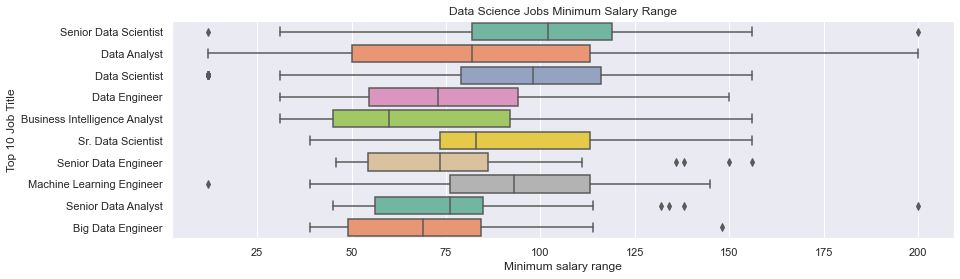

In [33]:
# plot boxplot base on Data Science Jobs Minimum Salary Range 
plt.figure(figsize=(14,4))
sns.set(style="darkgrid")
ax = sns.boxplot(x="salary_start_range", y="job_title", data=filtered_top_10_jobs, palette="Set2")
ax.set(xlabel='Minimum salary range', ylabel='Top 10 Job Title', title="Data Science Jobs Minimum Salary Range")
plt.show()

<font color = "blue">
    For the senior level roles, it is possible for people to get hired with more than the average minimum salary range. Having experience and achieving senior level role can possibly catapult you to at least 200K salaries. Big tech firms are mostly responsible for this as they are known to pay their employees well to retain top talent. I also believe that they are not much people who qualify for senior roles as Data Science roles are created quite recently so companies are willing to go the extra mile to pay them well. In general, the minimum salary for data analyst and data engineer can be lower to that of a Data Scientist. But there might be small cases of outliers where the minimum salary of Data engineer can reach to almost 150K. Perhaps they might not be much candidates interested in data engineer roles but there might be few companies who need them so to they might have difficulty hiring for that position and pay more once they find the right candidate.
</font>

### Top 10 job titles maximum salary range

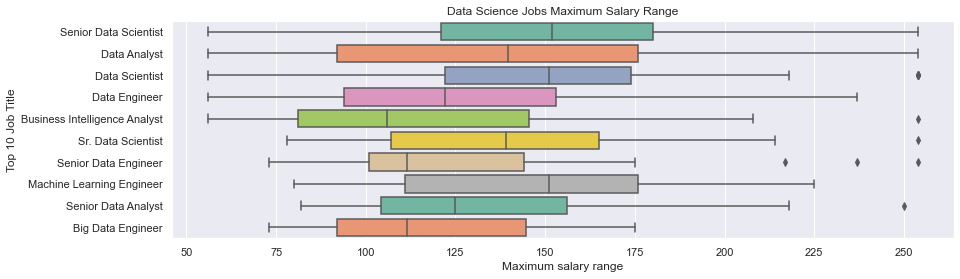

In [34]:
# plot boxplot base on Data Science Jobs Maximum Salary Range 
plt.figure(figsize=(14,4))
sns.set(style="darkgrid")
ax = sns.boxplot(x="salary_end_range", y="job_title", data=filtered_top_10_jobs, palette="Set2")
ax.set(xlabel='Maximum salary range', ylabel='Top 10 Job Title', title="Data Science Jobs Maximum Salary Range")
plt.show()

<font color = "blue">
    Most of the senior roles can command much higher salaries than the average ones even exceeding 250K per year. The non senior roles that can possibly fetch more than average maximum salary range are only Data Scientist and Business Intelligence Analyst.
</font>